In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [30]:
# Carico i dati da un file CSV
df = pd.read_csv('Cars Datasets 2025 (1).csv', encoding='windows-1252')
print(df.head(300))

    Company Names      Cars Names                        Engines  \
0         FERRARI   SF90 STRADALE                             V8   
1     ROLLS ROYCE         PHANTOM                            V12   
2            Ford             KA+                    1.2L Petrol   
3        MERCEDES         GT 63 S                             V8   
4            AUDI      AUDI R8 Gt                            V10   
..            ...             ...                            ...   
295    Volkswagen         Up! GTI                  1.0L Turbo I3   
296    Volkswagen         T-Cross  1.0L Turbo I3 / 1.5L Turbo I4   
297    Volkswagen            ID.5                       Electric   
298    Volkswagen  ID. Buzz Cargo                       Electric   
299    Volkswagen       Touareg R              Plug-in Hybrid V6   

    CC/Battery Capacity    HorsePower Total Speed Performance(0 - 100 )KM/H  \
0               3990 cc        963 hp    340 km/h                   2.5 sec   
1               6749 cc  

Osservazione dei tipi: Lanciando il comando .info(), perché tutte le colonne vengono indicate come object (stringhe) anche se concettualmente rappresentano numeri (come Prezzo o Cavalli)?
Vengono identificati come object per chè abbiamo informazioni (tipo le unità di misura) oltre al numero. Successivamente andranno puliti i dati e lasciati solo i numeri.


In [31]:
print(df.info())     # tipo di dato e valori mancanti
print("----------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB
None
----------------------------------------


Abbiamo 11 colonne composte tutte da oggetti. Nella 3 colonna, nella 6 e nella decima ci sono dei dati mancanti, ma essendo una percentuale molto bassa possiamo eliminare le righe. 

In [32]:
for col in ["Company Names","Cars Names","Engines","CC/Battery Capacity","HorsePower","Total Speed","Performance(0 - 100 )KM/H","Cars Prices","Fuel Types","Seats","Torque"]:
    group_df = df.groupby(col).count()
    print(df[col].nunique())
    print(group_df)

37
                   Cars Names  Engines  CC/Battery Capacity  HorsePower  \
Company Names                                                             
ASTON MARTIN               11       11                   11          11   
AUDI                       21       21                   21          21   
Acura                      27       27                   27          27   
BENTLEY                     1        1                    1           1   
BMW                        41       41                   41          41   
Bugatti                    10       10                   10          10   
Cadillac                   20       20                   20          20   
Chevrolet                  58       58                   58          58   
FERRARI                     9        9                    9           9   
Ford                       54       54                   54          54   
GMC                        59       59                   59          59   
HONDA                 

In [33]:
# Normalizzazione Company Names
df["Company Names"] = (
    df["Company Names"]
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace(r"\s+", " ", regex=True)
)

for col in ["Company Names"]:
    group_df = df.groupby(col).count()
    print(df[col].nunique())
    print(group_df)

31
                   Cars Names  Engines  CC/Battery Capacity  HorsePower  \
Company Names                                                             
ACURA                      27       27                   27          27   
ASTON MARTIN               11       11                   11          11   
AUDI                       21       21                   21          21   
BENTLEY                     1        1                    1           1   
BMW                        41       41                   41          41   
BUGATTI                    10       10                   10          10   
CADILLAC                   20       20                   20          20   
CHEVROLET                  58       58                   58          58   
FERRARI                     9        9                    9           9   
FORD                       54       54                   54          54   
GMC                        59       59                   59          59   
HONDA                 

Ora andiamo a eliminare la colonna Engines in quanto avendo 356 dati diversi su 1200 righe circa non sono significativi. 

In [34]:
engine_counts = df['Engines'].value_counts()
print("Conteggio motori:\n", engine_counts)

#Percentuale di ogni motore sul totale
engine_percentage = df['Engines'].value_counts(normalize=True) * 100
print("\nPercentuale motori sul totale:\n", engine_percentage.round(2))

#Elimino la colonna Engines dal DataFrame
df = df.drop(columns=['Engines'])
print("\nColonna 'Engines' eliminata" )

Conteggio motori:
 Engines
I4                                     64
V12                                    51
V6                                     39
Inline-4                               38
V8                                     34
                                       ..
2.5L Hybrid I4                          1
1.8L,HYBRID                             1
1.6L PETROL + PLUG IN HYBRID SYSTEM     1
2.5L Turbocharged Inline-4              1
2.5L Hybrid / Plug-in Hybrid            1
Name: count, Length: 356, dtype: int64

Percentuale motori sul totale:
 Engines
I4                                     5.25
V12                                    4.19
V6                                     3.20
Inline-4                               3.12
V8                                     2.79
                                       ... 
2.5L Hybrid I4                         0.08
1.8L,HYBRID                            0.08
1.6L PETROL + PLUG IN HYBRID SYSTEM    0.08
2.5L Turbocharged Inline-4         

I dati più frequenti sono: 
I4                                     64
V12                                    51
V6                                     39
Inline-4                               38
V8                                     34

Facciamo diventare tutte le colonne numeriche.


In [45]:
import re
import pandas as pd
import numpy as np
def extract_numeric(s):
    if pd.isna(s):
        return np.nan
    s = str(s)
    s = s.replace('–','-')  # sostituisci trattino lungo con normale
    # estrai tutti i numeri (anche decimali)
    numbers = re.findall(r'\d+(?:\.\d+)?', s)
    if len(numbers) == 0:
        return np.nan
    # converti in float e calcola la media se più di uno (intervalli)
    numbers = [float(n) for n in numbers]
    return np.mean(numbers)
    numbers = re.findall(r'\d+(?:\.\d+)?', s)
    if len(numbers) == 0:
     return np.nan

# Applica alle colonne principali
numeric_cols_map = {
    'HorsePower_numeric': 'HorsePower',
    'Total_Speed_numeric': 'Total Speed',
    'Torque_numeric': 'Torque',
    'CC_Battery_numeric': 'CC/Battery Capacity',
    'Performance_numeric': 'Performance(0 - 100 )KM/H',
    'Cars_Prices_numeric': 'Cars Prices',
    'Seats_numeric': 'Seats'
}

for new_col, old_col in numeric_cols_map.items():
    df[new_col] = df[old_col].apply(extract_numeric)

print(df[[*numeric_cols_map.keys()]].head())

   HorsePower_numeric  Total_Speed_numeric  Torque_numeric  \
0               963.0                340.0           800.0   
1               563.0                250.0           900.0   
2                77.5                165.0           120.0   
3               630.0                250.0           900.0   
4               602.0                320.0           560.0   

   CC_Battery_numeric  Performance_numeric  Cars_Prices_numeric  Seats_numeric  
0              3990.0                  2.5            33.666667            2.0  
1              6749.0                  5.3           230.000000            5.0  
2               100.5                 10.5             6.750000            5.0  
3               492.5                  3.2            80.500000            4.0  
4               104.5                  3.6           271.500000            2.0  


In [47]:
#Funzione per classificare Fuel Types
def normalize_fuel(x):
    t = x.strip()
    
    # PLUG-IN HYBRID
    if re.search(r"\bplug in\b", t) or re.search(r"\bplug\b", t):
        return "plug-in hybrid"
    
    # PETROL HYBRID (qualsiasi combinazione petrol + hybrid)
    if ("petrol" in t and "hybrid" in t) or ("hybrid" in t and "petrol" in t):
        return "petrol hybrid"
    
    # HYBRID semplice (solo la parola hybrid o altre combinazioni non plug-in/petrol)
    if "hybrid" in t:
        return "hybrid"
    
    # PETROL puro
    if "petrol" in t:
        return "petrol"
    
    # DIESEL
    if "diesel" in t:
        return "diesel"
    
    # ELECTRIC / EV
    if "electric" in t or "ev" in t:
        return "electric"
    
    # HYDROGEN
    if "hydrogen" in t:
        return "hydrogen"
    
    # Se nulla matcha → restituisco il testo normalizzato
    return t

#Applico la normalizzazione ---
df["Fuel Types"] = df["Fuel Types"].apply(normalize_fuel)

#Controllo i valori unici (per vedere se ci sono errori di battitura)
for col in ['Company Names', 'Fuel Types']:
    print(col, df[col].unique())

Company Names ['FERRARI' 'ROLLS ROYCE' 'FORD' 'MERCEDES' 'AUDI' 'BMW' 'ASTON MARTIN'
 'BENTLEY' 'LAMBORGHINI' 'TOYOTA' 'NISSAN' 'VOLVO' 'KIA' 'HONDA' 'HYUNDAI'
 'MAHINDRA' 'MARUTI SUZUKI' 'VOLKSWAGEN' 'PORSCHE' 'CADILLAC'
 'TATA MOTORS' 'TESLA' 'JEEP' 'MAZDA' 'CHEVROLET' 'GMC' 'PEUGEOT'
 'BUGATTI' 'JAGUAR LAND ROVER' 'ACURA' 'MITSUBISHI']
Fuel Types ['plug-in hybrid' 'Petrol' 'Diesel' 'Hybrid' 'Electric' 'Petrol/Diesel'
 'Plug-in Hybrid' 'Petrol/AWD' 'Petrol/Hybrid' 'Hydrogen' 'Diesel/Petrol'
 'Petrol/EV' 'Hybrid/Electric' 'Petrol, Hybrid' 'Petrol, Diesel'
 'Hybrid (Petrol)' 'CNG/Petrol' 'Hybrid/Petrol' 'Diesel Hybrid'
 'Petrol (Hybrid)' 'Hybrid (Gas + Electric)' 'Gas / Hybrid'
 'Hybrid / Plug-in']


In [46]:
df[['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
    'Torque_numeric','CC_Battery_numeric','Performance_numeric','Seats_numeric']].describe()

,HorsePower_numeric,Total_Speed_numeric,Cars_Prices_numeric,Torque_numeric,CC_Battery_numeric,Performance_numeric,Seats_numeric
count,1218.000000,1218.000000,1217.000000,1217.000000,1213.000000,1212.000000,1218.000000
mean,303.185140,216.467159,101.064024,428.708573,1495.957623,7.564686,4.851396
std,217.936283,53.051077,131.528471,288.099050,1927.749200,3.312010,1.514407
min,0.500000,80.000000,0.333333,5.000000,0.500000,1.900000,1.000000
25%,151.000000,180.000000,15.500000,250.000000,241.000000,5.275000,4.000000
50%,250.000000,200.000000,27.500000,366.000000,498.500000,7.100000,5.000000
75%,400.000000,250.000000,170.250000,559.000000,1999.000000,9.500000,5.000000
max,2488.000000,500.000000,569.500000,3500.000000,16100.000000,35.000000,20.000000


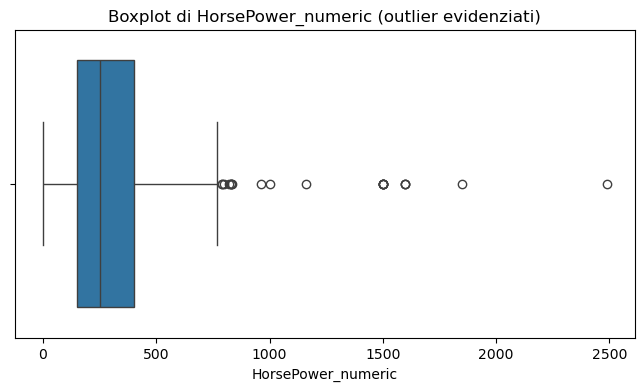


Colonna: HorsePower_numeric
Numero di outlier: 22
     HorsePower_numeric
0                 963.0
10                789.0
13                789.0
32               1160.0
33               1000.0
41                836.0
42                819.0
255              2488.0
667               800.0
795               830.0
810               830.0
819               830.0
880              1500.0
881              1500.0
882              1600.0
883              1500.0
884              1500.0
885              1500.0
886              1600.0
887              1500.0
888              1850.0
889              1600.0


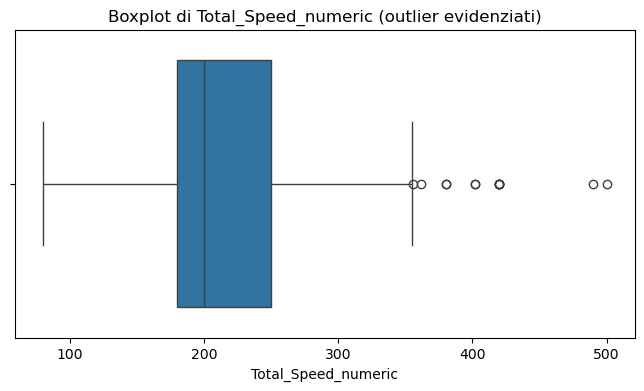


Colonna: Total_Speed_numeric
Numero di outlier: 13
     Total_Speed_numeric
8                  356.0
32                 402.0
33                 362.0
668                402.0
880                420.0
882                490.0
883                420.0
884                420.0
885                380.0
886                380.0
887                420.0
888                500.0
889                420.0


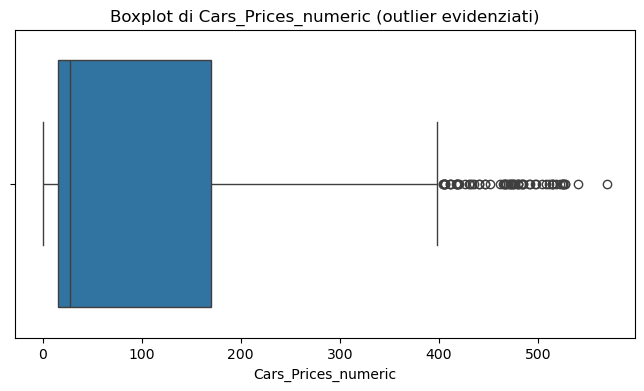


Colonna: Cars_Prices_numeric
Numero di outlier: 66
      Cars_Prices_numeric
17                  476.5
206                 469.5
232                 515.5
252                 419.5
254                 484.5
...                   ...
780                 446.5
798                 440.5
811                 404.0
812                 406.0
1053                497.0

[66 rows x 1 columns]


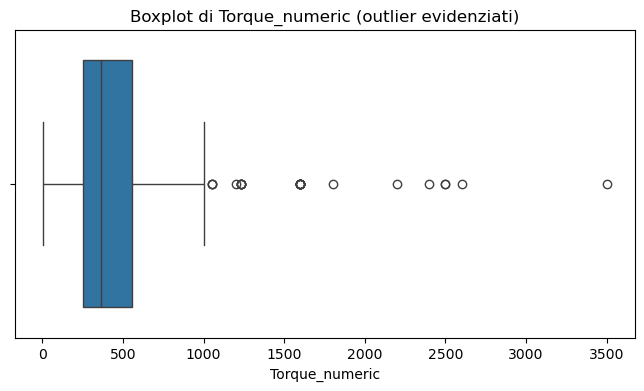


Colonna: Torque_numeric
Numero di outlier: 26
      Torque_numeric
561           1050.0
607           1050.0
716           1234.0
739           1234.0
749           1234.0
768           1234.0
776           1234.0
880           1600.0
881           1600.0
882           1600.0
883           1600.0
884           1600.0
885           1600.0
886           1600.0
887           1600.0
888           1600.0
889           1600.0
890           2600.0
891           3500.0
892           2200.0
893           2500.0
894           2400.0
895           1800.0
896           2500.0
897           1200.0
1032          1051.0


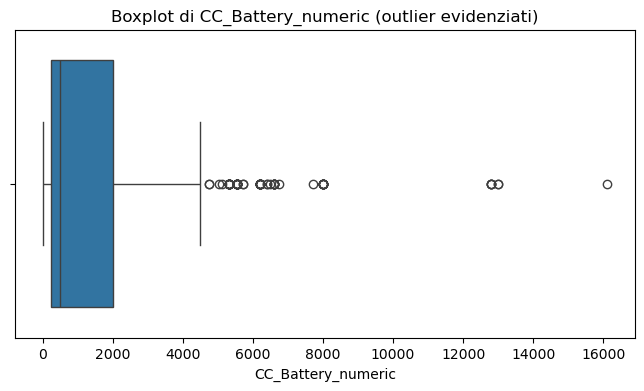


Colonna: CC_Battery_numeric
Numero di outlier: 86
     CC_Battery_numeric
1                6749.0
10               6496.0
383              5552.0
387              5552.0
400              5552.0
..                  ...
894             12800.0
895             12800.0
896             12800.0
897              7700.0
898              5100.0

[86 rows x 1 columns]


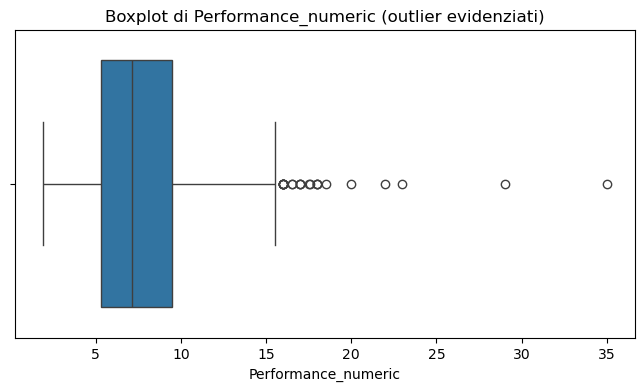


Colonna: Performance_numeric
Numero di outlier: 23
      Performance_numeric
317                  23.0
318                  17.5
477                  18.0
478                  18.5
635                  29.0
636                  16.0
637                  16.0
641                  16.5
643                  17.0
645                  17.0
652                  16.0
655                  17.6
892                  16.0
893                  16.5
895                  17.0
896                  18.0
897                  20.0
898                  22.0
1125                 16.0
1162                 16.0
1174                 18.0
1182                 16.0
1197                 35.0


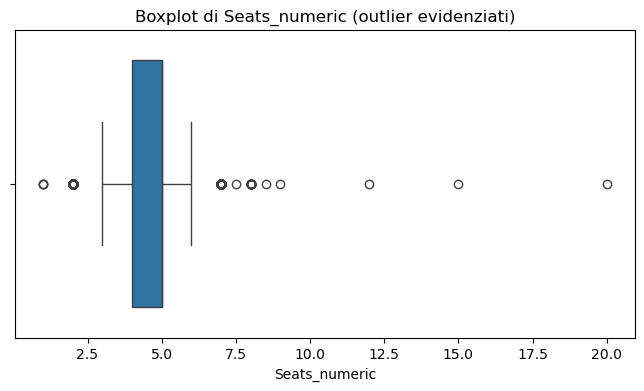


Colonna: Seats_numeric
Numero di outlier: 327
      Seats_numeric
0               2.0
4               2.0
5               2.0
6               2.0
8               2.0
...             ...
1206            2.0
1208            2.0
1209            2.0
1212            1.0
1214            7.0

[327 rows x 1 columns]


In [49]:
numeric_cols=df[['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
    'Torque_numeric','CC_Battery_numeric','Performance_numeric','Seats_numeric']]
# Funzione per calcolare IQR e individuare outlier
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

# Loop su tutte le colonne
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot di {col} (outlier evidenziati)')
    plt.show()
    
    outliers = find_outliers(df, col)
    print(f"\nColonna: {col}")
    print(f"Numero di outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]])

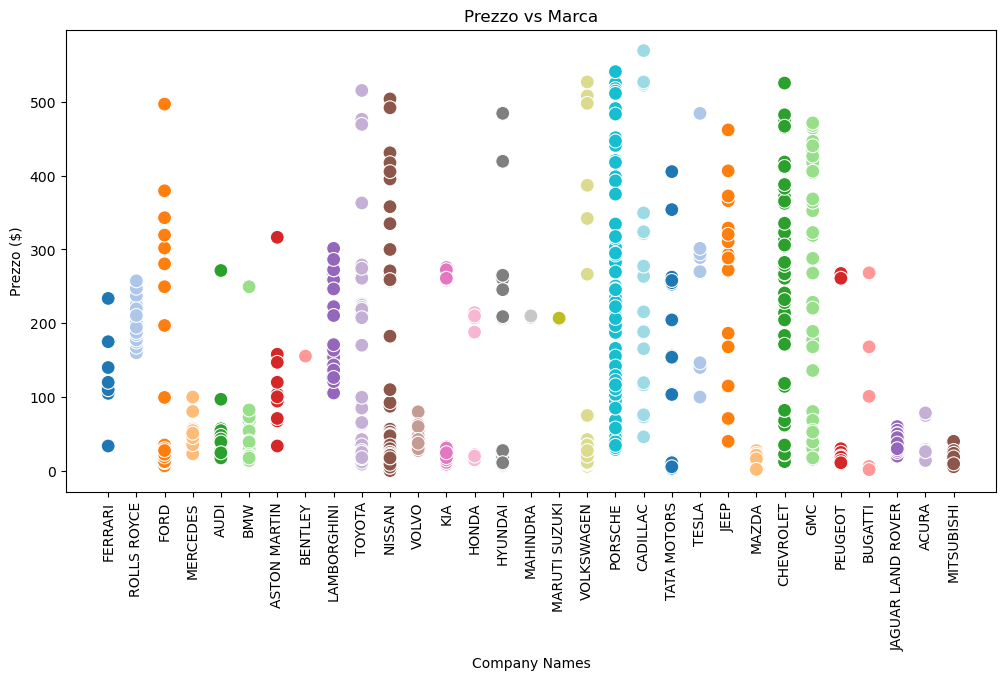

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

#Grafico prezzo vs marca
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='Company Names', 
    y='Cars_Prices_numeric', 
    data=df,
    hue='Company Names',   # colore diverso per ogni marca
    palette='tab20',       # palette colori
    s=100                  # dimensione punti
)
plt.xticks(rotation=90)    # ruota le etichette delle marche
plt.ylabel('Prezzo ($)')
plt.title('Prezzo vs Marca')
plt.legend([],[], frameon=False)  # nasconde la legenda per non sovraccaricare
plt.show()

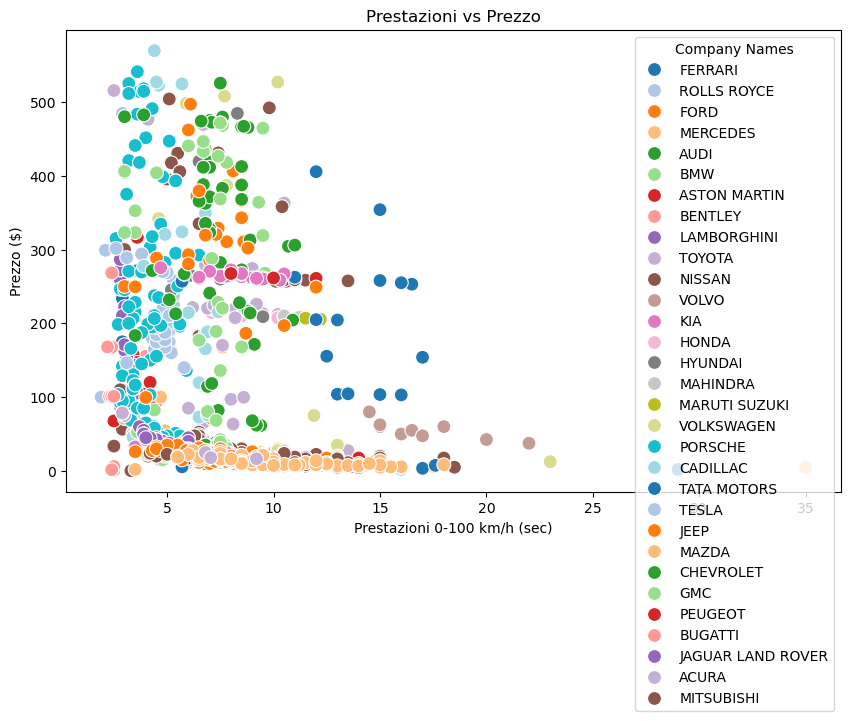

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Performance_numeric', 
    y='Cars_Prices_numeric', 
    data=df,
    hue='Company Names',   # colore per la marca
    palette='tab20',
    s=100
)
plt.xlabel('Prestazioni 0-100 km/h (sec)')
plt.ylabel('Prezzo ($)')
plt.title('Prestazioni vs Prezzo')
plt.show()


                     HorsePower_numeric  Total_Speed_numeric  \
HorsePower_numeric             1.000000             0.699558   
Total_Speed_numeric            0.699558             1.000000   
Cars_Prices_numeric            0.243109             0.161043   
Torque_numeric                 0.741040             0.436490   
CC_Battery_numeric             0.338843             0.129149   
Performance_numeric           -0.624270            -0.785148   

                     Cars_Prices_numeric  Torque_numeric  CC_Battery_numeric  \
HorsePower_numeric              0.243109        0.741040            0.338843   
Total_Speed_numeric             0.161043        0.436490            0.129149   
Cars_Prices_numeric             1.000000        0.190671            0.218384   
Torque_numeric                  0.190671        1.000000            0.522474   
CC_Battery_numeric              0.218384        0.522474            1.000000   
Performance_numeric            -0.250339       -0.411003           -0.0

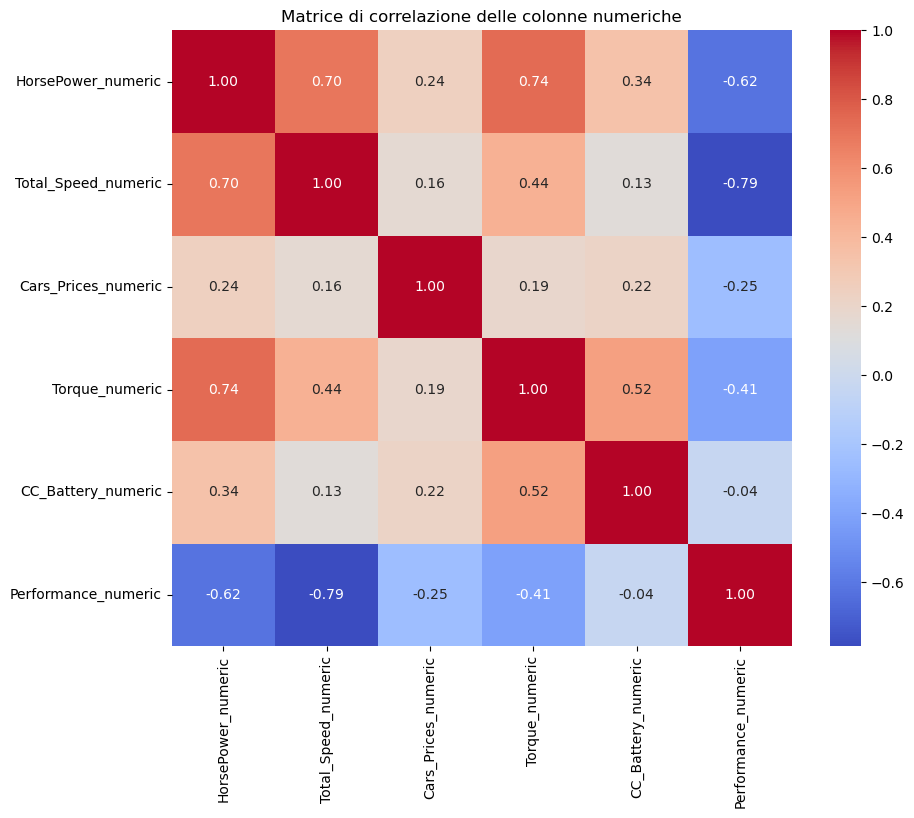

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selezioniamo solo le colonne numeriche
numeric_cols = ['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
                'Torque_numeric','CC_Battery_numeric','Performance_numeric']

# Calcolo matrice di correlazione
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

# Heatmap per visualizzarla
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice di correlazione delle colonne numeriche")
plt.show()

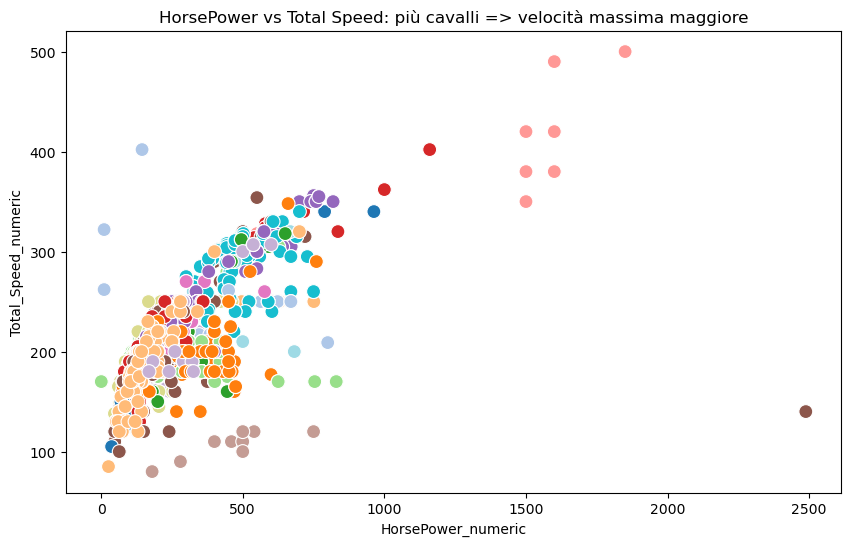

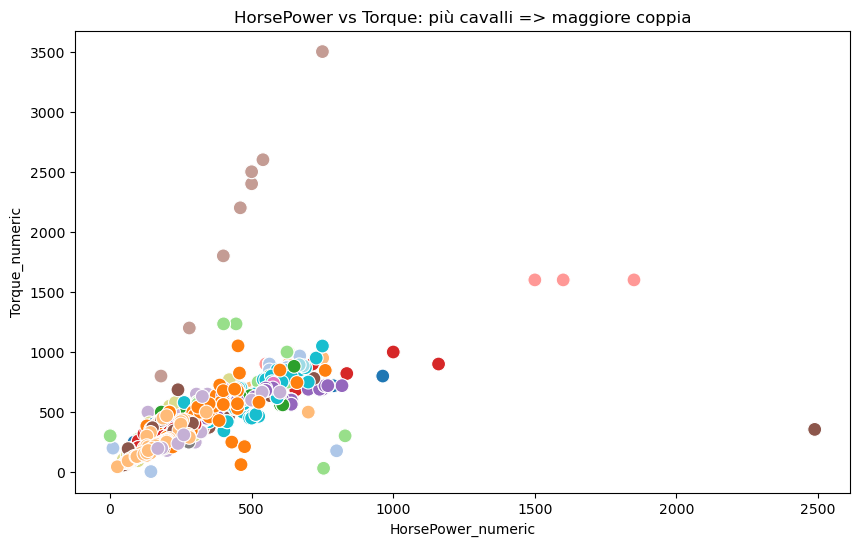

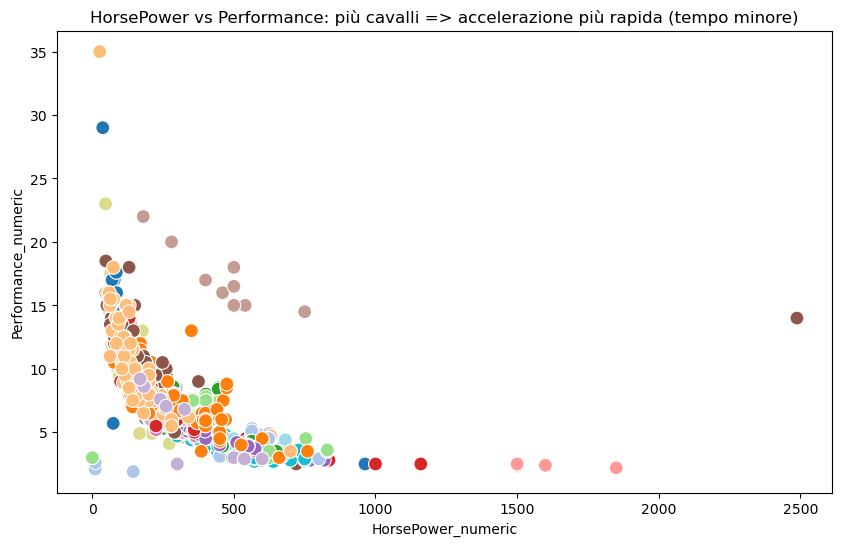

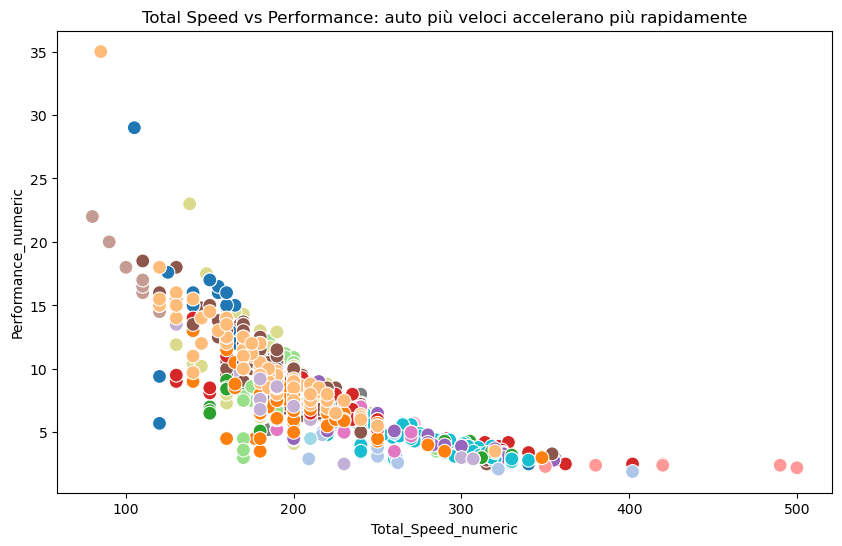

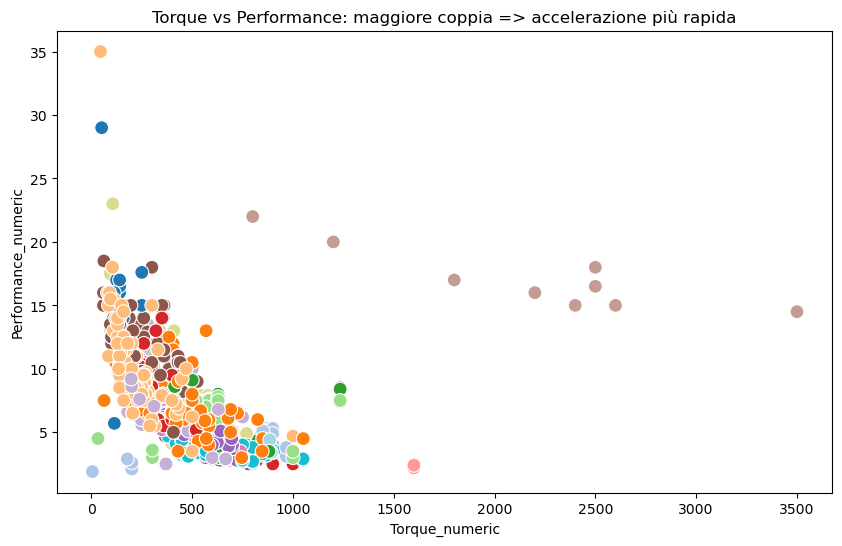

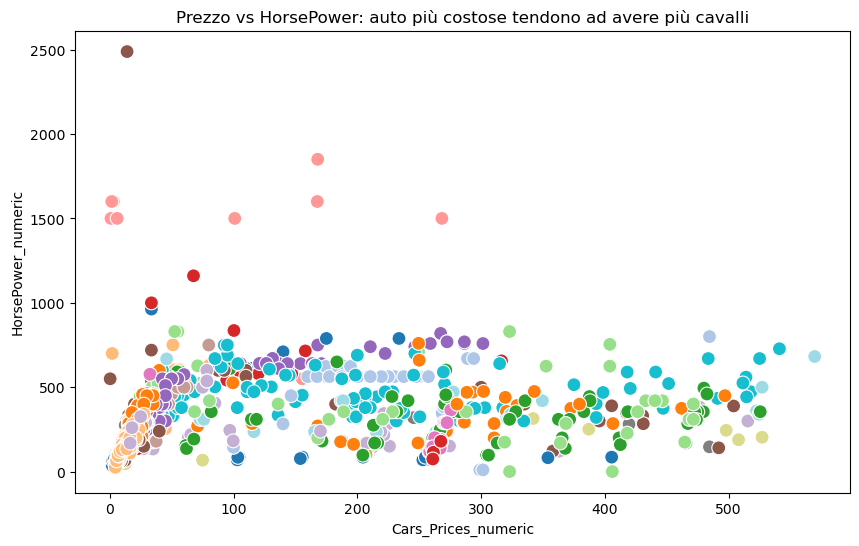

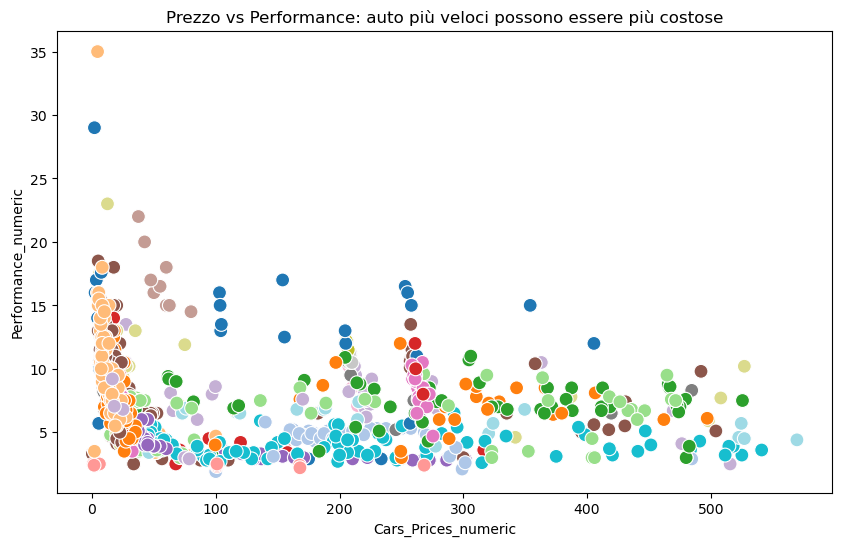

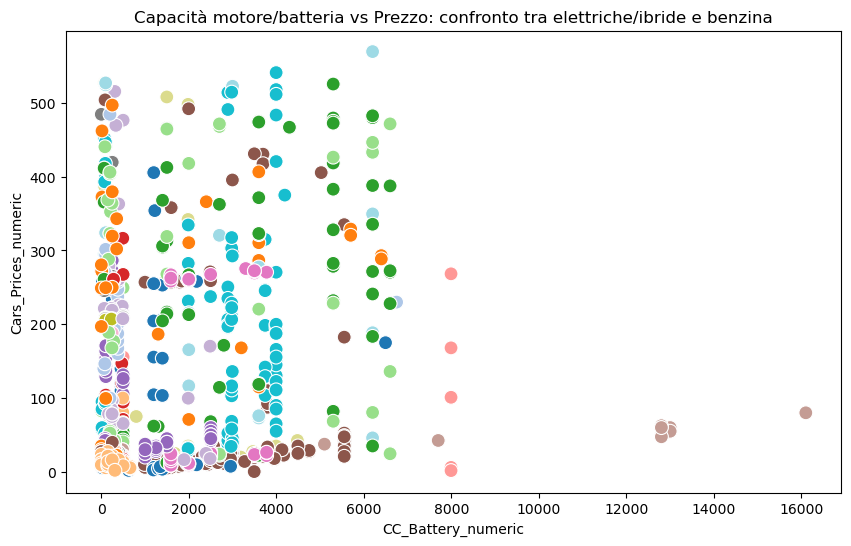

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colonne numeriche pulite
numeric_cols = ['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
                'Torque_numeric','CC_Battery_numeric','Performance_numeric']

# Lista dei grafici scatter da creare
scatter_plots = [
    ('HorsePower_numeric', 'Total_Speed_numeric', 'HorsePower vs Total Speed: più cavalli => velocità massima maggiore'),
    ('HorsePower_numeric', 'Torque_numeric', 'HorsePower vs Torque: più cavalli => maggiore coppia'),
    ('HorsePower_numeric', 'Performance_numeric', 'HorsePower vs Performance: più cavalli => accelerazione più rapida (tempo minore)'),
    ('Total_Speed_numeric', 'Performance_numeric', 'Total Speed vs Performance: auto più veloci accelerano più rapidamente'),
    ('Torque_numeric', 'Performance_numeric', 'Torque vs Performance: maggiore coppia => accelerazione più rapida'),
    ('Cars_Prices_numeric', 'HorsePower_numeric', 'Prezzo vs HorsePower: auto più costose tendono ad avere più cavalli'),
    ('Cars_Prices_numeric', 'Performance_numeric', 'Prezzo vs Performance: auto più veloci possono essere più costose'),
    ('CC_Battery_numeric', 'Cars_Prices_numeric', 'Capacità motore/batteria vs Prezzo: confronto tra elettriche/ibride e benzina')
]

# Creazione dei grafici
for x_col, y_col, comment in scatter_plots:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=df, 
        hue='Company Names', 
        palette='tab20', 
        s=100
    )
    plt.title(comment)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend([],[], frameon=False)  # nasconde legenda per chiarezza
    plt.show()

In [54]:
#Rimuovo gli outlier
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Creo una copia pulita
df_clean = df.copy()

numeric_cols = ['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
                'Torque_numeric','CC_Battery_numeric','Performance_numeric']

# Rimuovo gli outlier in tutte le colonne numeriche
for col in numeric_cols:
    df_clean = remove_outliers(df_clean, col)

print(f"Dati originali: {len(df)}, Dati senza outlier: {len(df_clean)}")

Dati originali: 1218, Dati senza outlier: 1037


Matrice di correlazione senza outlier:

                     HorsePower_numeric  Total_Speed_numeric  \
HorsePower_numeric             1.000000             0.804924   
Total_Speed_numeric            0.804924             1.000000   
Cars_Prices_numeric            0.307154             0.244454   
Torque_numeric                 0.903829             0.680435   
CC_Battery_numeric             0.108783             0.245198   
Performance_numeric           -0.813584            -0.834881   

                     Cars_Prices_numeric  Torque_numeric  CC_Battery_numeric  \
HorsePower_numeric              0.307154        0.903829            0.108783   
Total_Speed_numeric             0.244454        0.680435            0.245198   
Cars_Prices_numeric             1.000000        0.250820            0.147252   
Torque_numeric                  0.250820        1.000000            0.061378   
CC_Battery_numeric              0.147252        0.061378            1.000000   
Performance_numeric            

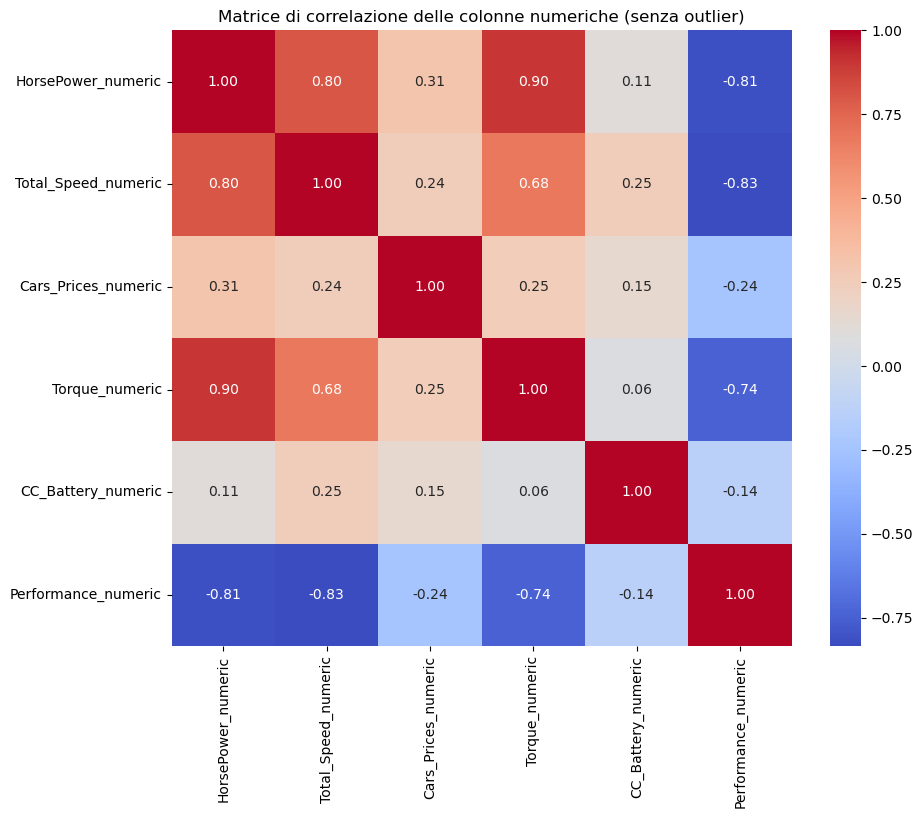

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonne numeriche pulite
numeric_cols = ['HorsePower_numeric','Total_Speed_numeric','Cars_Prices_numeric',
                'Torque_numeric','CC_Battery_numeric','Performance_numeric']

# Calcolo matrice di correlazione senza outlier
corr_clean = df_clean[numeric_cols].corr()

# Stampo la matrice senza outlier
print("Matrice di correlazione senza outlier:\n")
print(corr_clean)

# Heatmap per visualizzarla
plt.figure(figsize=(10,8))
sns.heatmap(corr_clean, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice di correlazione delle colonne numeriche (senza outlier)")
plt.show()

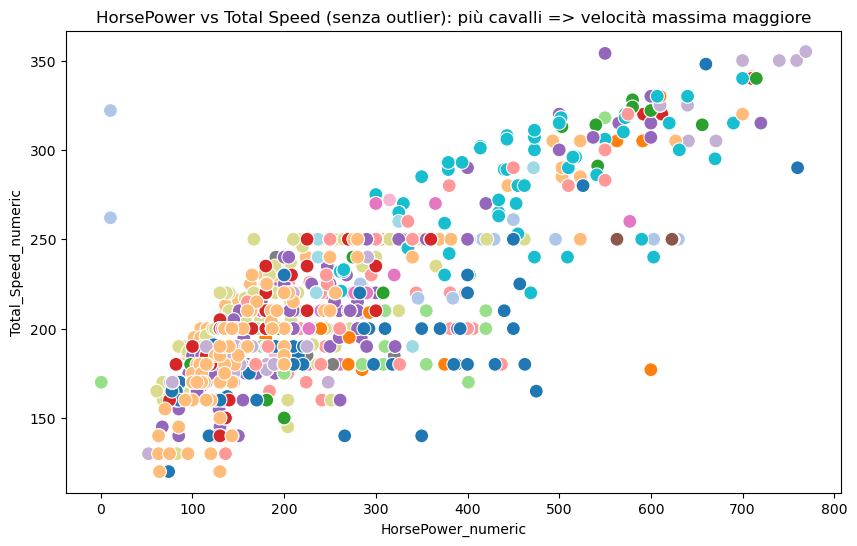

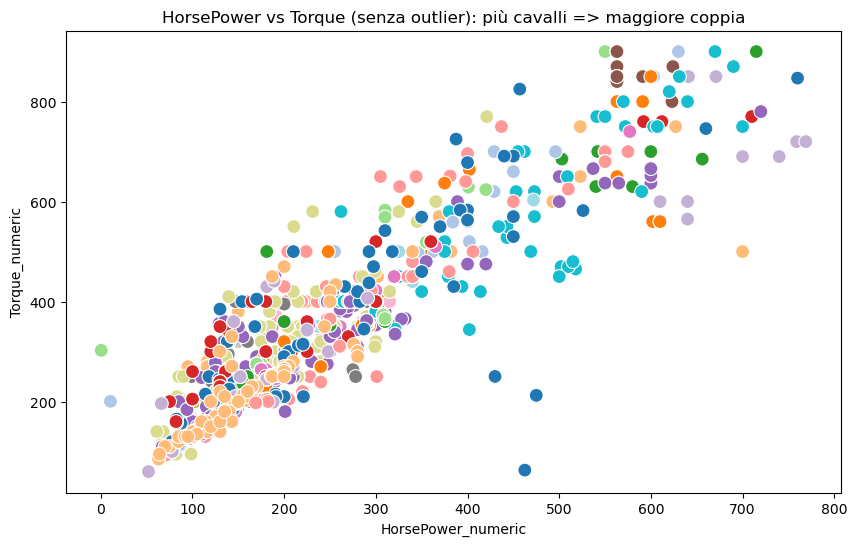

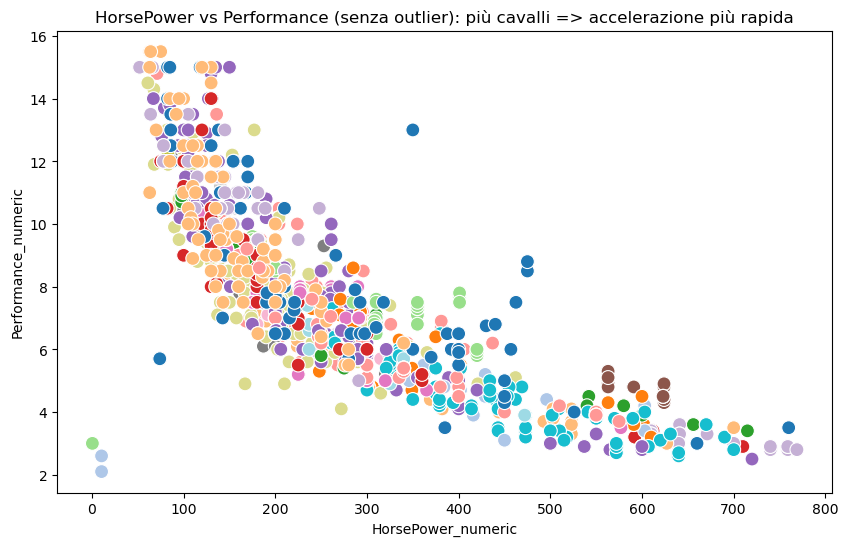

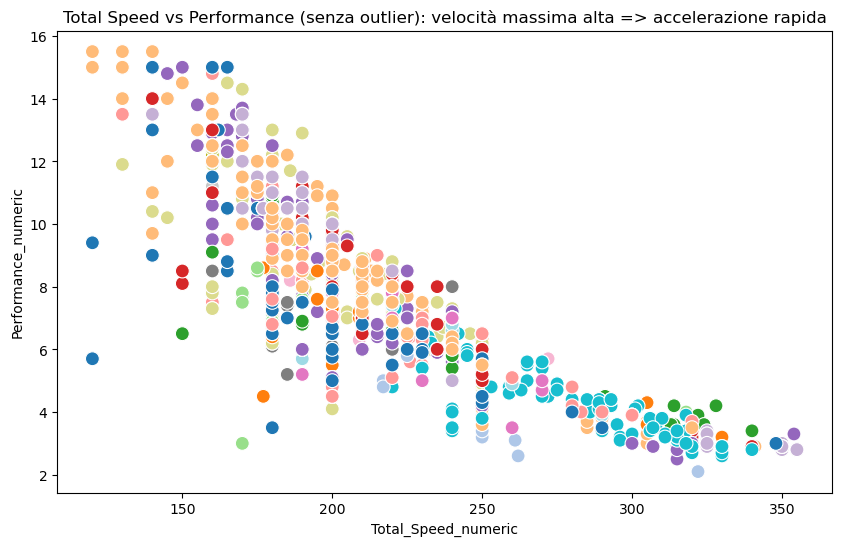

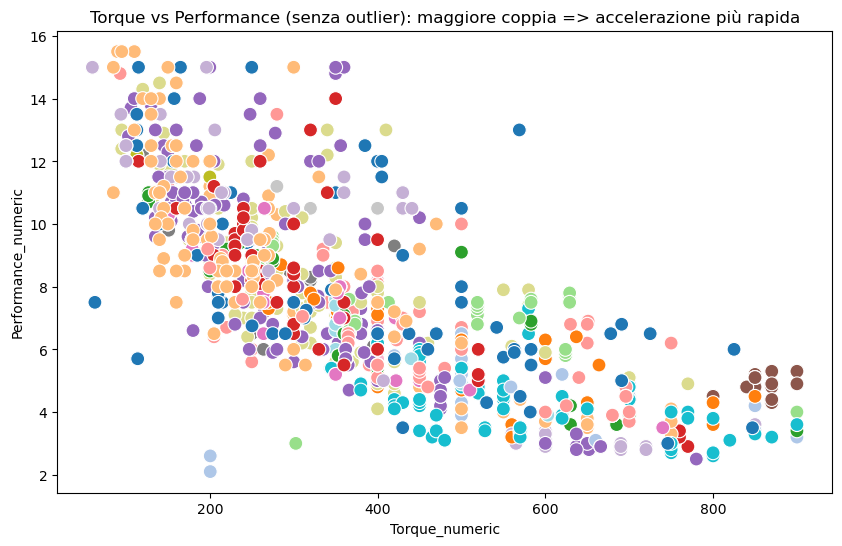

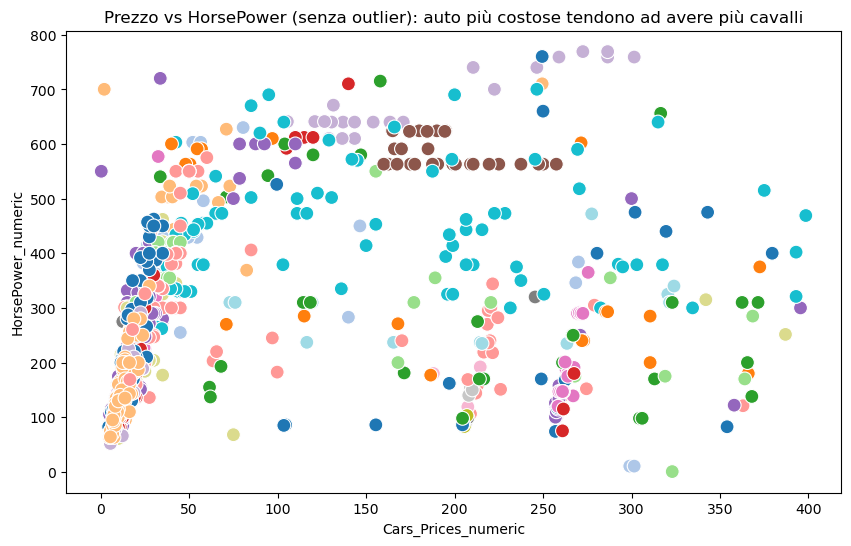

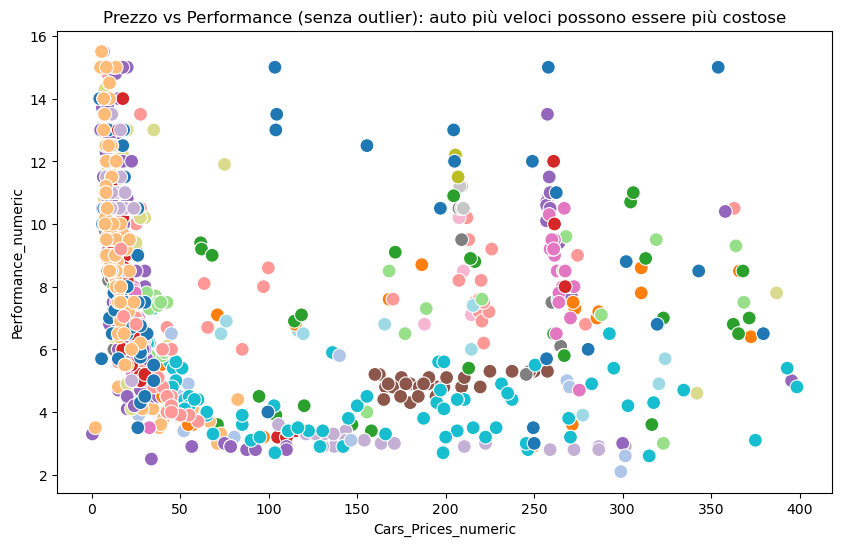

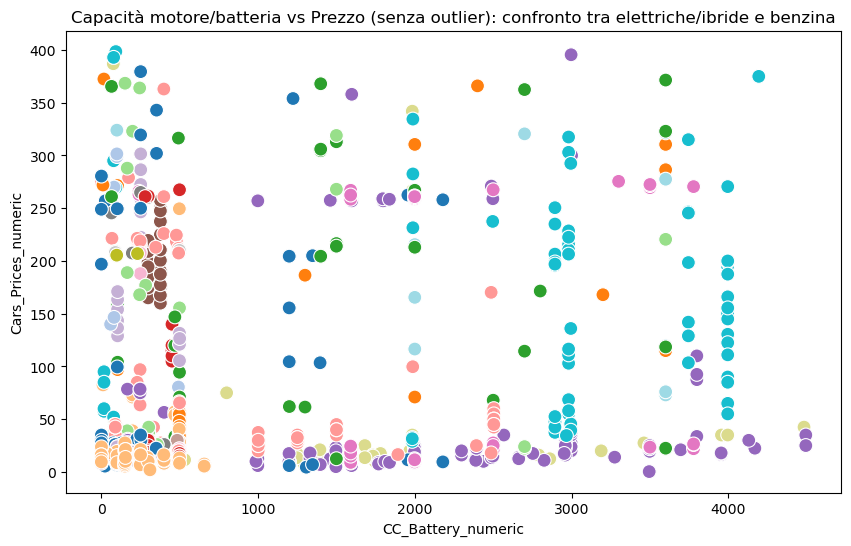

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista dei grafici scatter da creare con commenti descrittivi
scatter_plots = [
    ('HorsePower_numeric', 'Total_Speed_numeric', 'HorsePower vs Total Speed (senza outlier): più cavalli => velocità massima maggiore'),
    ('HorsePower_numeric', 'Torque_numeric', 'HorsePower vs Torque (senza outlier): più cavalli => maggiore coppia'),
    ('HorsePower_numeric', 'Performance_numeric', 'HorsePower vs Performance (senza outlier): più cavalli => accelerazione più rapida'),
    ('Total_Speed_numeric', 'Performance_numeric', 'Total Speed vs Performance (senza outlier): velocità massima alta => accelerazione rapida'),
    ('Torque_numeric', 'Performance_numeric', 'Torque vs Performance (senza outlier): maggiore coppia => accelerazione più rapida'),
    ('Cars_Prices_numeric', 'HorsePower_numeric', 'Prezzo vs HorsePower (senza outlier): auto più costose tendono ad avere più cavalli'),
    ('Cars_Prices_numeric', 'Performance_numeric', 'Prezzo vs Performance (senza outlier): auto più veloci possono essere più costose'),
    ('CC_Battery_numeric', 'Cars_Prices_numeric', 'Capacità motore/batteria vs Prezzo (senza outlier): confronto tra elettriche/ibride e benzina')
]

# Creazione dei grafici
for x_col, y_col, comment in scatter_plots:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=df_clean,      # usa il dataframe senza outlier
        hue='Company Names', 
        palette='tab20', 
        s=100
    )
    plt.title(comment)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend([],[], frameon=False)  # nasconde la legenda per chiarezza
    plt.show()

In [57]:
# Calcolo dei quantili
q1 = df['Cars_Prices_numeric'].quantile(0.33)
q2 = df['Cars_Prices_numeric'].quantile(0.66)

print("Quantile 33%:", q1)
print("Quantile 66%:", q2)

# Creazione funzione per categorizzare
def classify_price(p):
    if pd.isna(p):
        return np.nan
    if p <= q1:
        return "Economy"
    elif p <= q2:
        return "Premium"
    else:
        return "Luxury"

# Applicazione della funzione
df['Price_Category'] = df['Cars_Prices_numeric'].apply(classify_price)

# Controllo risultato
print(df[['Cars_Prices_numeric', 'Price_Category']].head())


Quantile 33%: 18.570000000000007
Quantile 66%: 66.06000000000006
   Cars_Prices_numeric Price_Category
0            33.666667        Premium
1           230.000000         Luxury
2             6.750000        Economy
3            80.500000         Luxury
4           271.500000         Luxury


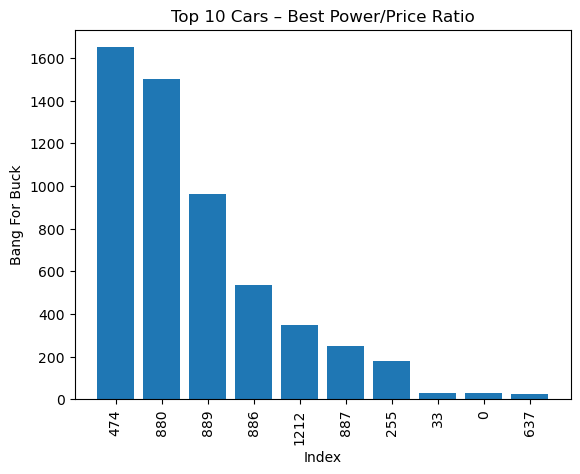

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#Creazione Bang_For_Buck
df['Bang_For_Buck'] = np.where(
    df['Cars_Prices_numeric'] > 0,
    df['HorsePower_numeric'] / df['Cars_Prices_numeric'],
    np.nan
)

#Preparazione dati per il grafico
df_bfb = df[['Bang_For_Buck']].dropna()
top10_bfb = df_bfb.sort_values('Bang_For_Buck', ascending=False).head(10)

#Grafico (Bar Chart delle migliori 10 auto)
plt.figure()
plt.bar(top10_bfb.index.astype(str), top10_bfb['Bang_For_Buck'])
plt.xlabel("Index")
plt.ylabel("Bang For Buck")
plt.title("Top 10 Cars – Best Power/Price Ratio")
plt.xticks(rotation=90)
plt.show()


Ogni barra rappresenta un’auto (identificata dal suo indice nel dataset).
L’altezza della barra mostra quanto è alto il rapporto potenza/prezzo (Bang_For_Buck).
Più alta è la barra, più “conveniente” è quell’auto in termini di prestazioni rispetto al prezzo.

   Performance_numeric  Supercar
0                  2.5      True
1                  5.3     False
2                 10.5     False
3                  3.2      True
4                  3.6     False


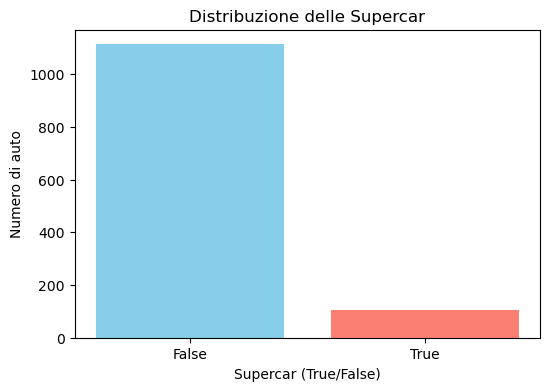

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Creazione feature binaria Supercar: True se accelerazione < 3.5 s
df['Supercar'] = df['Performance_numeric'] < 3.5

# Controllo dei valori
print(df[['Performance_numeric', 'Supercar']].head())

# Grafico della distribuzione Supercar
counts = df['Supercar'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values, color=['skyblue','salmon'])
plt.xlabel("Supercar (True/False)")
plt.ylabel("Numero di auto")
plt.title("Distribuzione delle Supercar")
plt.show()


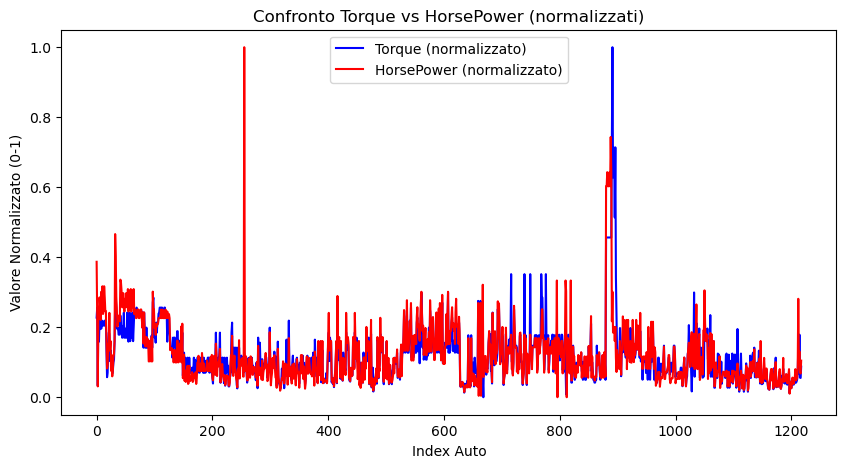

In [61]:
import matplotlib.pyplot as plt

# Normalizzazione 0-1
df['Torque_norm'] = (df['Torque_numeric'] - df['Torque_numeric'].min()) / (df['Torque_numeric'].max() - df['Torque_numeric'].min())
df['HorsePower_norm'] = (df['HorsePower_numeric'] - df['HorsePower_numeric'].min()) / (df['HorsePower_numeric'].max() - df['HorsePower_numeric'].min())

# Grafico comparativo
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Torque_norm'], label='Torque (normalizzato)', color='blue')
plt.plot(df.index, df['HorsePower_norm'], label='HorsePower (normalizzato)', color='red')
plt.xlabel("Index Auto")
plt.ylabel("Valore Normalizzato (0-1)")
plt.title("Confronto Torque vs HorsePower (normalizzati)")
plt.legend()
plt.show()


In [ ]:
Entrambe le curve sono scalate tra 0 e 1.
Permette di vedere la relazione relativa tra cavalli e coppia senza che una sovrasti l’altra per 
differenza di scala.
Si possono notare facilmente pattern come: 
Auto con alta potenza e alta coppia → entrambe le curve alte
Auto con alta potenza ma bassa coppia → divergenza tra le curve

In [68]:
def normalize_fuel(x):
    if pd.isna(x):
        return np.nan

    t = str(x).lower().strip()

    # --- PLUG-IN HYBRID ---
    if re.search(r"plug[\s-]*in", t) or "phev" in t or "hybrid / plug-in" in t:
        return "plug-in hybrid"

    # --- ELECTRIC ---
    if ("electric" in t or "ev" in t or "full electric" in t) and "hybrid" not in t:
        return "electric"

    # --- HYDROGEN ---
    if "hydrogen" in t or "fuel cell" in t:
        return "hydrogen"

    # --- HYBRID (non plug-in) ---
    if "hybrid" in t and "plug" not in t:
        return "hybrid"

    # --- PETROL ---
    if "petrol" in t or "gasoline" in t:
        return "petrol"

    # --- DIESEL ---
    if "diesel" in t:
        return "diesel"

    # --- CNG/LPG ---
    if "cng" in t or "lpg" in t or "gas" in t: # CNG: Compressed Natural Gas | LPG: Liquefied Petroleum Gas
        return "cng/lpg"

    # fallback
    return t

#Applico la normalizzazione
df["Fuel Types Clean"] = df["Fuel Types"].apply(normalize_fuel)

#Controllo i valori unici (per vedere se ci sono errori di battitura)
for col in ['Company Names', 'Fuel Types Clean']:
    print(col, df[col].unique())
def extract_numeric(s):
    if pd.isna(s):
        return np.nan

    s = str(s)
    s = s.replace('–', '-')

#Estraggo tutti i numeri
    nums = re.findall(r'\d+(?:\.\d+)?', s)
    if not nums:
        return np.nan

#Media se intervallo
    nums = [float(x) for x in nums]
    return np.mean(nums)

#Estraggo numero
df["CC_Batt_numeric"] = df["CC/Battery Capacity"].apply(extract_numeric)

#Creo le nuove colonne
def get_engine_cc(row):
    if row["Fuel Types Clean"] in ["petrol", "diesel", "cng/lpg", "hybrid"]:
        return row["CC_Batt_numeric"]
    return np.nan

def get_battery_kwh(row):
    if row["Fuel Types Clean"] in ["electric", "plug-in hybrid"]:
        return row["CC_Batt_numeric"]
    return np.nan

df["Engine_CC"] = df.apply(get_engine_cc, axis=1)
df["Battery_kWh"] = df.apply(get_battery_kwh, axis=1)

print(df[["CC/Battery Capacity", "Fuel Types Clean", "Engine_CC", "Battery_kWh"]])

Company Names ['FERRARI' 'ROLLS ROYCE' 'FORD' 'MERCEDES' 'AUDI' 'BMW' 'ASTON MARTIN'
 'BENTLEY' 'LAMBORGHINI' 'TOYOTA' 'NISSAN' 'VOLVO' 'KIA' 'HONDA' 'HYUNDAI'
 'MAHINDRA' 'MARUTI SUZUKI' 'VOLKSWAGEN' 'PORSCHE' 'CADILLAC'
 'TATA MOTORS' 'TESLA' 'JEEP' 'MAZDA' 'CHEVROLET' 'GMC' 'PEUGEOT'
 'BUGATTI' 'JAGUAR LAND ROVER' 'ACURA' 'MITSUBISHI']
Fuel Types Clean ['plug-in hybrid' 'petrol' 'diesel' 'hybrid' 'electric' 'hydrogen']
        CC/Battery Capacity Fuel Types Clean  Engine_CC  Battery_kWh
0                   3990 cc   plug-in hybrid        NaN       3990.0
1                   6749 cc           petrol     6749.0          NaN
2                  1,200 cc           petrol      100.5          NaN
3                  3,982 cc           petrol      492.5          NaN
4                  5,204 cc           petrol      104.5          NaN
...                     ...              ...        ...          ...
1213                2487 cc           hybrid     2487.0          NaN
1214      2393 cc + Ba

Colonna CC/Battery Capacity:
auto termiche -> cilindrata (in cc)
auto elettriche o ibride plug-in -> capacità della batteria (in kWh)
infatti quello che ti ha stampato è Engine_CC e Battery_kwh
dove Nan sta in kwh se ho motore termico e in cc se è elettrico